- Etapa 2: Si el diagnóstico fue confirmado, predecir qué tipo de trastorno del sueño tiene (Sleep_disorder, variable categórica de múltiples clases).

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

from imblearn.over_sampling import SMOTE

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [8]:


df = pd.read_csv('../data/combined_sleep_dataset.csv')
df


,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Diagnosis_Confirmed,Sleep_disorder
0,1,27,9,6.1,6,42,6,3,11,77,4200,1,1
1,1,27,9,6.1,6,42,6,3,11,77,4200,1,3
2,1,27,9,6.1,6,42,6,3,11,77,4200,1,0
3,1,27,9,6.1,6,42,6,3,11,77,4200,1,3
4,1,27,9,6.1,6,42,6,3,11,77,4200,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2251,0,59,5,8.1,9,75,3,3,23,68,7000,1,5
2252,0,59,5,8.1,9,75,3,3,23,68,7000,1,5
2253,0,59,5,8.1,9,75,3,3,23,68,7000,1,5
2254,0,59,5,8.1,9,75,3,3,23,68,7000,1,5


---

In [13]:
# Etiqueta a predecir
y = df["Sleep_disorder"]

# Variables predictoras (excluimos la etiqueta y Diagnosis_Confirmed, que no aporta a la predicción del tipo de trastorno)
X = df.drop(columns=["Sleep_disorder", "Diagnosis_Confirmed"])


In [ ]:
# Escalar los datos

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [15]:
# Dividir datos en entrenamiento y prueba

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

In [16]:
# Entrenar el modelo con Random Forest

from sklearn.ensemble import RandomForestClassifier

# Clasificador multiclase
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [17]:
# Evaluar el modelo

from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(X_test)

print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))

print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))


Matriz de confusión:
[[112   5   1  18  11   5]
 [ 19   5   0   8   5   0]
 [  4   6   1  12   0   0]
 [ 34   5   0  54   2   4]
 [ 22   1   1  13   3   3]
 [  5   2   0   0   0  91]]

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.57      0.74      0.64       152
           1       0.21      0.14      0.16        37
           2       0.33      0.04      0.08        23
           3       0.51      0.55      0.53        99
           4       0.14      0.07      0.09        43
           5       0.88      0.93      0.91        98

    accuracy                           0.59       452
   macro avg       0.44      0.41      0.40       452
weighted avg       0.54      0.59      0.55       452



- Matriz de Confusión:
    - Muestra el rendimiento del modelo comparando las etiquetas reales con las predichas.
Cada fila representa las etiquetas reales, cada columna las etiquetas predichas.
Los números en la diagonal principal indican las predicciones correctas (verdaderos positivos).
Los números fuera de la diagonal indican las predicciones incorrectas (falsos positivos o falsos negativos).
Permite ver dónde el modelo se equivoca al clasificar entre las diferentes clases.

- Reporte de Clasificación:
- Proporciona métricas clave de evaluación para cada clase individualmente y a nivel general.
- Precisión: ¿De lo que predijo el modelo como una clase, cuánto era realmente esa clase?
- Recall (Exhaustividad): ¿De lo que realmente era una clase, cuánto identificó correctamente el modelo?
- F1-score: Media armónica de precisión y recall, útil para un equilibrio.
- Support: Número de instancias reales de cada clase.
- Accuracy (Exactitud): Proporción total de predicciones correctas. En este caso, 59%.
- Macro avg: Promedio simple de las métricas por clase (sin considerar el desbalance).
- Weighted avg: Promedio ponderado de las métricas por clase (considerando el desbalance).

- Interpretación Clave:
    - El rendimiento del modelo varía significativamente entre las clases.
La clase 5 se predice muy bien (alta precisión y recall).
Las clases 1, 2 y 4 presentan dificultades para ser predichas correctamente (baja precisión y recall).
La exactitud general del modelo es del 59%.
El desbalance de clases influye en las métricas agregadas, siendo el "weighted avg" una mejor representación del rendimiento general.


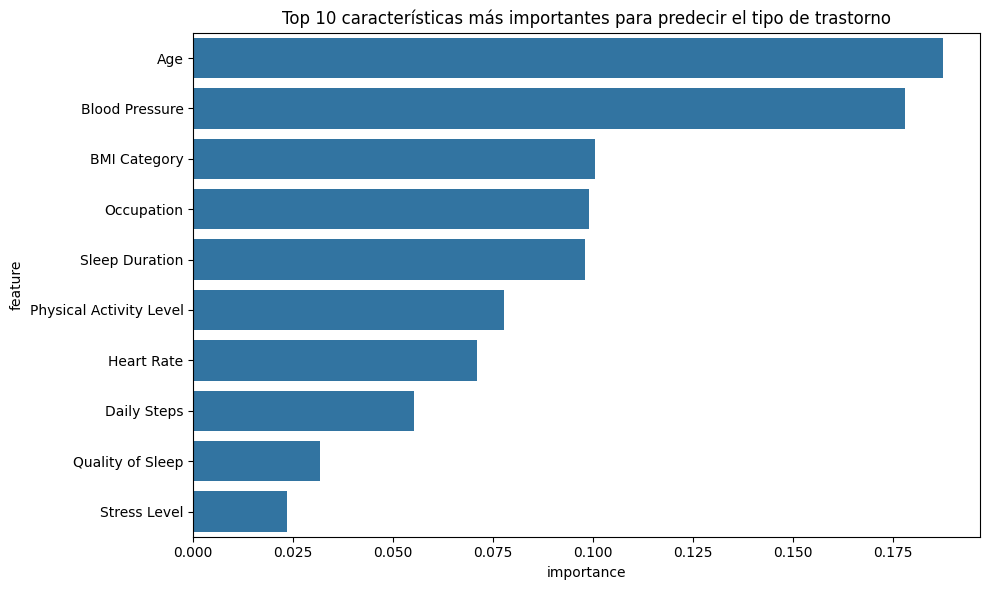

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Ensure importances and features have the same length
importances = model.feature_importances_[:len(X.columns)]
features = X.columns
feat_df = pd.DataFrame({"feature": features, "importance": importances})
feat_df = feat_df.sort_values(by="importance", ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=feat_df.head(10), x="importance", y="feature")
plt.title("Top 10 características más importantes para predecir el tipo de trastorno")
plt.tight_layout()
plt.show()


#### probar otras cosas


In [20]:
from xgboost import XGBClassifier

xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.59      0.72      0.64       152
           1       0.21      0.14      0.16        37
           2       0.50      0.04      0.08        23
           3       0.50      0.55      0.52        99
           4       0.21      0.16      0.18        43
           5       0.91      0.93      0.92        98

    accuracy                           0.59       452
   macro avg       0.49      0.42      0.42       452
weighted avg       0.57      0.59      0.57       452



In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# Variables predictoras y objetivo
X = df.drop(columns=["Sleep_disorder", "Diagnosis_Confirmed"])
y = df["Sleep_disorder"]

# Escalado
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar SMOTE para balancear clases
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

# División entrenamiento/test con estratificación
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)


In [23]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Modelo multiclase
model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
model.fit(X_train, y_train)

# Predicción
y_pred = model.predict(X_test)

# Evaluación
print(" Matriz de Confusión:")
print(confusion_matrix(y_test, y_pred))

print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred))


 Matriz de Confusión:
[[ 72  15  14  29  15   6]
 [  8  76  47   9  11   0]
 [  4  32  88  16  11   1]
 [  3  19  32  65  28   5]
 [  4  24  39  12  71   2]
 [  1   5   1   0   2 142]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.78      0.48      0.59       151
           1       0.44      0.50      0.47       151
           2       0.40      0.58      0.47       152
           3       0.50      0.43      0.46       152
           4       0.51      0.47      0.49       152
           5       0.91      0.94      0.93       151

    accuracy                           0.57       909
   macro avg       0.59      0.57      0.57       909
weighted avg       0.59      0.57      0.57       909



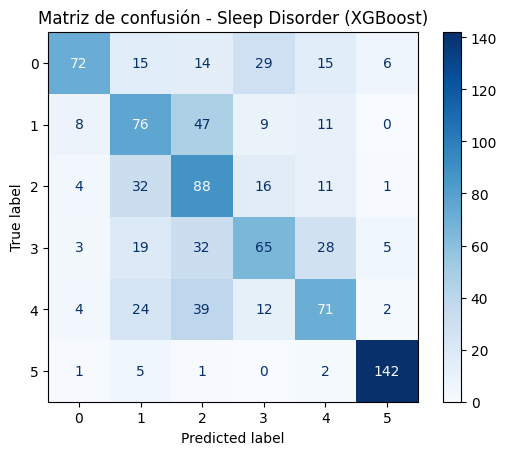

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap="Blues")
plt.title("Matriz de confusión - Sleep Disorder (XGBoost)")
plt.show()


#### Probar GridSearchCV

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

X = df.drop(columns=["Sleep_disorder", "Diagnosis_Confirmed"])
y = df["Sleep_disorder"]

# Escalar
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

# Dividir
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)


In [31]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# Definir el modelo base
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)

# Hiperparámetros a probar
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0]
}

# GridSearchCV
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring='f1_weighted',  # o 'accuracy', 'precision_weighted', etc.
    cv=3,                   # validación cruzada de 3 particiones
    verbose=1,
    n_jobs=-1               # Usa todos los núcleos disponibles
)

# Ejecutar la búsqueda
grid_search.fit(X_train, y_train)


Fitting 3 folds for each of 36 candidates, totalling 108 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='mlogloss', feature_types=None,
                                     feature_weights=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constrain...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7], 'n_estimators': [50, 100],
                         'subsample': [0.8, 1.0]},
             scoring='f1_weighted', verbose=1)

In [32]:
# Mostrar mejores parámetros encontrados
print("Mejores parámetros encontrados:")
print(grid_search.best_params_)

# Mejor modelo entrenado
best_model = grid_search.best_estimator_

# Predicciones y evaluación
from sklearn.metrics import classification_report, confusion_matrix

y_pred = best_model.predict(X_test)
print("\nMatriz de Confusión:")
print(confusion_matrix(y_test, y_pred))

print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred))


Mejores parámetros encontrados:
{'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 100, 'subsample': 1.0}

Matriz de Confusión:
[[ 72  15  14  29  15   6]
 [  8  76  47   9  11   0]
 [  2  34  88  16  12   0]
 [  3  19  32  65  28   5]
 [  4  24  39  12  71   2]
 [  1   5   1   0   2 142]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.80      0.48      0.60       151
           1       0.44      0.50      0.47       151
           2       0.40      0.58      0.47       152
           3       0.50      0.43      0.46       152
           4       0.51      0.47      0.49       152
           5       0.92      0.94      0.93       151

    accuracy                           0.57       909
   macro avg       0.59      0.57      0.57       909
weighted avg       0.59      0.57      0.57       909



- Rendimiento general del modelo
    - Exactitud (accuracy): 57%
    - Promedio ponderado F1-score: 0.57

- Hay confusión entre las clases 1, 2, 3 y 4: probablemente porque tienen síntomas similares o están subrepresentadas en las características.

- Las métricas recall y precisión son muy dispares en varias clases, lo que indica un desequilibrio en la predicción.

- Esto significa que el modelo tiene un rendimiento aceptable pero mejorable: acierta un poco más de la mitad de los casos considerando todas las clases.


---

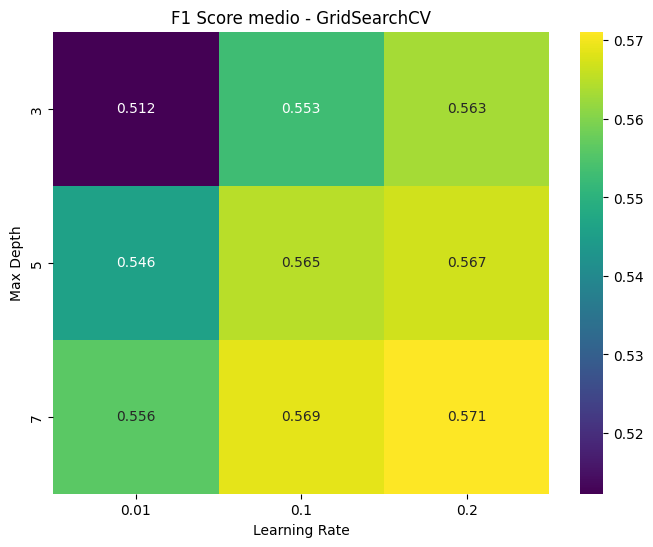

In [33]:

# Convertir resultados del grid a DataFrame
results_df = pd.DataFrame(grid_search.cv_results_)

# Pivot para heatmap
pivot = results_df.pivot_table(
    values='mean_test_score',
    index='param_max_depth',
    columns='param_learning_rate'
)

# Plot
plt.figure(figsize=(8, 6))
sns.heatmap(pivot, annot=True, fmt=".3f", cmap="viridis")
plt.title("F1 Score medio - GridSearchCV")
plt.xlabel("Learning Rate")
plt.ylabel("Max Depth")
plt.show()


In [38]:
from sklearn.utils.class_weight import compute_class_weight

# Recalcula pesos con más énfasis en clases difíciles
weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights = dict(zip(np.unique(y_train), weights))

# Al entrenar el modelo:
xgb_model = xgb.XGBClassifier(
    objective='multi:softprob',
    num_class=6,
    eval_metric='mlogloss',
    learning_rate=0.2,
    max_depth=7,
    n_estimators=100,
    subsample=1.0,
    scale_pos_weight=None,  # no se usa para multiclase, mejor usar `sample_weight`
    use_label_encoder=False
)

# Entrenamiento con sample_weight por clase
from sklearn.utils import compute_sample_weight
sample_weights = compute_sample_weight(class_weight=class_weights, y=y_train)
xgb_model.fit(X_train, y_train, sample_weight=sample_weights)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None, num_class=6, ...)

In [39]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)


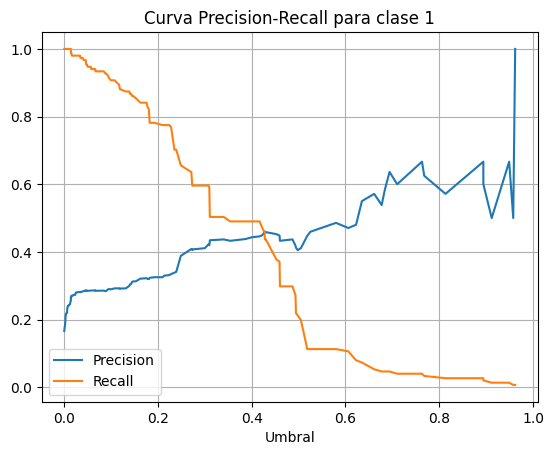

In [40]:
from sklearn.metrics import precision_recall_curve
import numpy as np

y_proba = best_model.predict_proba(X_test)  # probabilidades para todas las clases

# Ejemplo: curvas para la clase 1
precision, recall, thresholds = precision_recall_curve((y_test == 1).astype(int), y_proba[:, 1])
plt.plot(thresholds, precision[:-1], label="Precision")
plt.plot(thresholds, recall[:-1], label="Recall")
plt.xlabel("Umbral")
plt.legend()
plt.title("Curva Precision-Recall para clase 1")
plt.grid()
plt.show()


#### Probar con Keras

In [41]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical

y_train_cat = to_categorical(y_train, num_classes=6)
y_test_cat = to_categorical(y_test, num_classes=6)

model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(6, activation='softmax')  # multiclase
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train_cat, validation_data=(X_test, y_test_cat), epochs=50, batch_size=32)


Epoch 1/50
114/114 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.2904 - loss: 1.6593 - val_accuracy: 0.4400 - val_loss: 1.3762
Epoch 2/50
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4138 - loss: 1.4006 - val_accuracy: 0.4345 - val_loss: 1.3478
Epoch 3/50
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4385 - loss: 1.3705 - val_accuracy: 0.4411 - val_loss: 1.3273
Epoch 4/50
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4314 - loss: 1.3621 - val_accuracy: 0.4466 - val_loss: 1.3109
Epoch 5/50
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4295 - loss: 1.3454 - val_accuracy: 0.4609 - val_loss: 1.3067
Epoch 6/50
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4534 - loss: 1.3183 - val_accuracy: 0.4466 - val_loss: 1.2931
Epoch 7/50
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4559 - loss: 1.3137 - val_accuracy: 0.4587 - val_loss: 1.2883
Epoch 8/50
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4612 - loss: 1.3078 - val_accuracy: 0.

##### Probar cambiar a categorica la columna Sleep Disorder

In [42]:
# Asegúrate de que sea categórica
df["Sleep_disorder"] = df["Sleep_disorder"].astype("category")


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2256 entries, 0 to 2255
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Gender                   2256 non-null   int64   
 1   Age                      2256 non-null   int64   
 2   Occupation               2256 non-null   int64   
 3   Sleep Duration           2256 non-null   float64 
 4   Quality of Sleep         2256 non-null   int64   
 5   Physical Activity Level  2256 non-null   int64   
 6   Stress Level             2256 non-null   int64   
 7   BMI Category             2256 non-null   int64   
 8   Blood Pressure           2256 non-null   int64   
 9   Heart Rate               2256 non-null   int64   
 10  Daily Steps              2256 non-null   int64   
 11  Diagnosis_Confirmed      2256 non-null   int64   
 12  Sleep_disorder           2256 non-null   category
dtypes: category(1), float64(1), int64(11)
memory usage: 214.0 KB


In [44]:
# Separar variables predictoras y objetivo
X = df.drop(columns=["Sleep_disorder", "Diagnosis_Confirmed"])  # Excluimos también diagnosis si no queremos sesgo
y = df["Sleep_disorder"].cat.codes  # Convertimos a códigos numéricos para entrenamiento


In [45]:
# Dividir datos

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [46]:
# Escalar características
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [47]:
# Entrenar modelo multiclase (XGBoost)

from xgboost import XGBClassifier

model = XGBClassifier(
    objective="multi:softprob",
    num_class=len(df["Sleep_disorder"].cat.categories),
    eval_metric="mlogloss",
    use_label_encoder=False,
    random_state=42
)

model.fit(X_train_scaled, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None, num_class=6, ...)

In [50]:
# Evaluar el modelo

from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(X_test_scaled)

print("Matriz de Confusión:")
print(confusion_matrix(y_test, y_pred))

print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred, target_names=[str(c) for c in df["Sleep_disorder"].cat.categories]))


Matriz de Confusión:
[[107   3   0  23  14   5]
 [ 18   4   0   9   6   0]
 [  3   6   0  14   0   0]
 [ 29   4   0  58   6   2]
 [ 17   3   0  16   5   2]
 [  4   1   0   0   2  91]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.60      0.70      0.65       152
           1       0.19      0.11      0.14        37
           2       0.00      0.00      0.00        23
           3       0.48      0.59      0.53        99
           4       0.15      0.12      0.13        43
           5       0.91      0.93      0.92        98

    accuracy                           0.59       452
   macro avg       0.39      0.41      0.39       452
weighted avg       0.54      0.59      0.56       452



---

##### Probar más cosas

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Convertimos Sleep_disorder a categórica
df['Sleep_disorder'] = df['Sleep_disorder'].astype('category')

# Separar características y etiqueta
X = df.drop('Sleep_disorder', axis=1)
y = df['Sleep_disorder']

# División en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Detectar columnas numéricas y categóricas
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = X.select_dtypes(include=['category', 'object']).columns.tolist()

# Escalado de columnas numéricas
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols)
    ]
)

X_train.head(), y_train.head()


(      Gender  Age  Occupation  Sleep Duration  Quality of Sleep  \
 309        1   32           1             6.0                 6   
 1684       0   50           5             6.1                 6   
 844        0   38           0             7.1                 8   
 364        1   33           1             6.0                 6   
 966        0   40           0             7.2                 8   
 
       Physical Activity Level  Stress Level  BMI Category  Blood Pressure  \
 309                        30             8             0               9   
 1684                       90             8             3              23   
 844                        60             4             0               0   
 364                        30             8             0               9   
 966                        55             6             1               5   
 
       Heart Rate  Daily Steps  Diagnosis_Confirmed  
 309           72         5000                    1  
 1684       

In [ ]:
df['Sleep_disorder'] = df['Sleep_disorder'].astype('category')

In [78]:
# Guardar el DataFrame df con la columna Sleep_disorder como categórica en un nuevo DataFrame
df.to_csv('../data/sleep_predictor_dataset.csv', index=False)

In [70]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt
import seaborn as sns

# Definimos los modelos a evaluar
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42)
}

# Diccionario para almacenar resultados
results = {}

# Evaluamos cada modelo
for name, model in models.items():
    # Crear pipeline con preprocesador y modelo
    pipe = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])
    
    # Entrenar el modelo
    pipe.fit(X_train, y_train)
    
    # Evaluar en test
    y_pred = pipe.predict(X_test)
    
    # Guardar métricas
    results[name] = {
        "classification_report": classification_report(y_test, y_pred, output_dict=True),
        "confusion_matrix": confusion_matrix(y_test, y_pred)
    }

results.keys()  # Ver qué modelos fueron evaluados


dict_keys(['Logistic Regression', 'Random Forest', 'Gradient Boosting'])


Reporte de Clasificación - Logistic Regression:
              precision    recall  f1-score     support
0              0.577922  0.585526  0.581699  152.000000
1              0.250000  0.027027  0.048780   37.000000
2              0.400000  0.086957  0.142857   23.000000
3              0.317708  0.616162  0.419244   99.000000
4              0.000000  0.000000  0.000000   43.000000
5              0.876289  0.867347  0.871795   98.000000
accuracy       0.526549  0.526549  0.526549    0.526549
macro avg      0.403653  0.363836  0.344063  452.000000
weighted avg   0.494742  0.526549  0.487721  452.000000


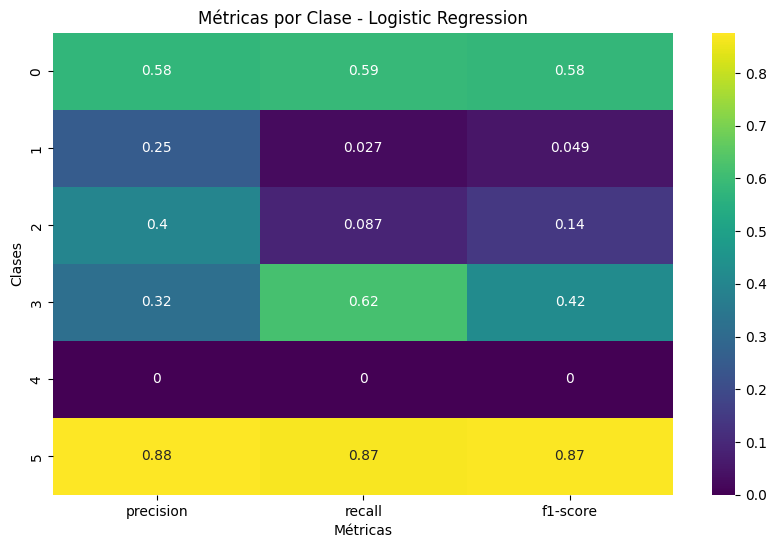


Reporte de Clasificación - Random Forest:
              precision    recall  f1-score     support
0              0.571429  0.736842  0.643678  152.000000
1              0.208333  0.135135  0.163934   37.000000
2              0.333333  0.043478  0.076923   23.000000
3              0.514286  0.545455  0.529412   99.000000
4              0.142857  0.069767  0.093750   43.000000
5              0.883495  0.928571  0.905473   98.000000
accuracy       0.588496  0.588496  0.588496    0.588496
macro avg      0.442289  0.409875  0.402195  452.000000
weighted avg   0.543964  0.588496  0.554985  452.000000


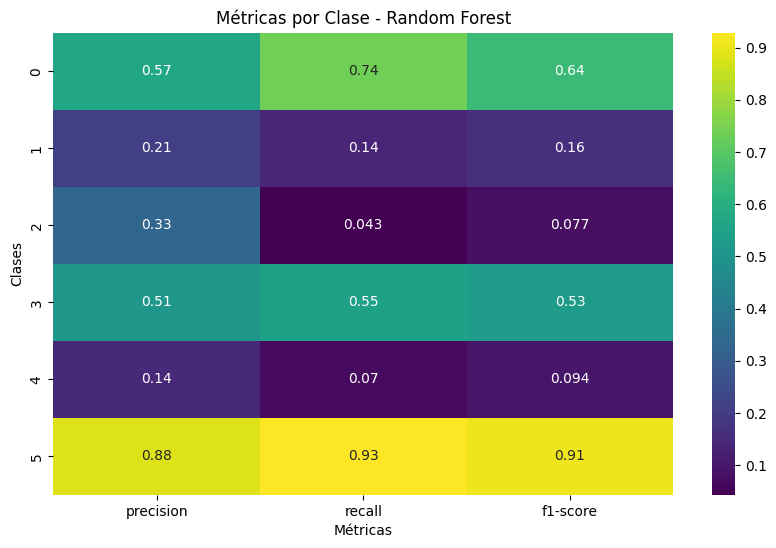


Reporte de Clasificación - Gradient Boosting:
              precision    recall  f1-score     support
0              0.614525  0.723684  0.664653  152.000000
1              0.230769  0.081081  0.120000   37.000000
2              0.500000  0.043478  0.080000   23.000000
3              0.516949  0.616162  0.562212   99.000000
4              0.275000  0.255814  0.265060   43.000000
5              0.910000  0.928571  0.919192   98.000000
accuracy       0.612832  0.612832  0.612832    0.612832
macro avg      0.507874  0.441465  0.435186  452.000000
weighted avg   0.587675  0.612832  0.585054  452.000000


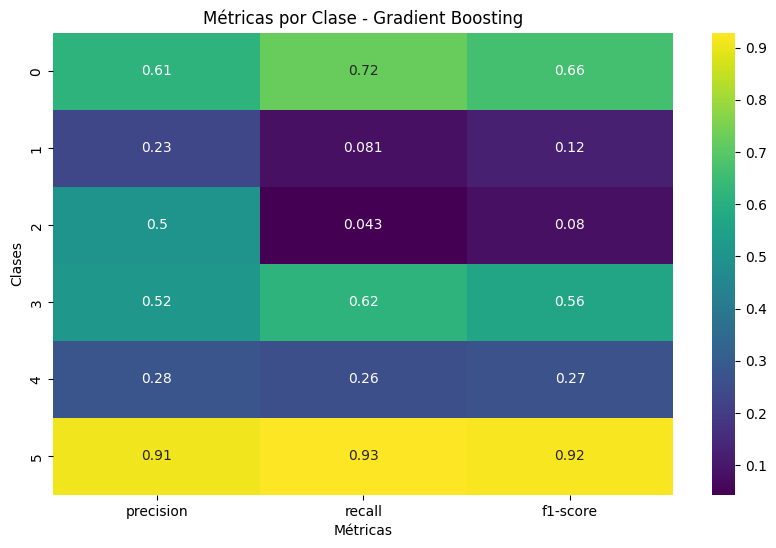

In [73]:
import pandas as pd

for model_name, model_results in results.items():
    report = model_results["classification_report"]
    df_report = pd.DataFrame(report).transpose()  # Transponer para facilitar la visualización
    
    # Mostrar el reporte completo como tabla
    print(f"\nReporte de Clasificación - {model_name}:")
    print(df_report)

    # Mostrar precision, recall y f1-score para cada clase y el promedio ponderado
    plt.figure(figsize=(10, 6))
    sns.heatmap(df_report.iloc[:-3, :-1], annot=True, cmap="viridis") # Excluir 'accuracy', 'macro avg', 'weighted avg'
    plt.title(f"Métricas por Clase - {model_name}")
    plt.xlabel("Métricas")
    plt.ylabel("Clases")
    plt.show()
    


Comparación de Métricas entre Modelos:
                     Precisión (Weighted)  Recall (Weighted)  \
Logistic Regression              0.494742           0.526549   
Random Forest                    0.543964           0.588496   
Gradient Boosting                0.587675           0.612832   

                     F1-score (Weighted)  Accuracy  
Logistic Regression             0.487721  0.526549  
Random Forest                   0.554985  0.588496  
Gradient Boosting               0.585054  0.612832  


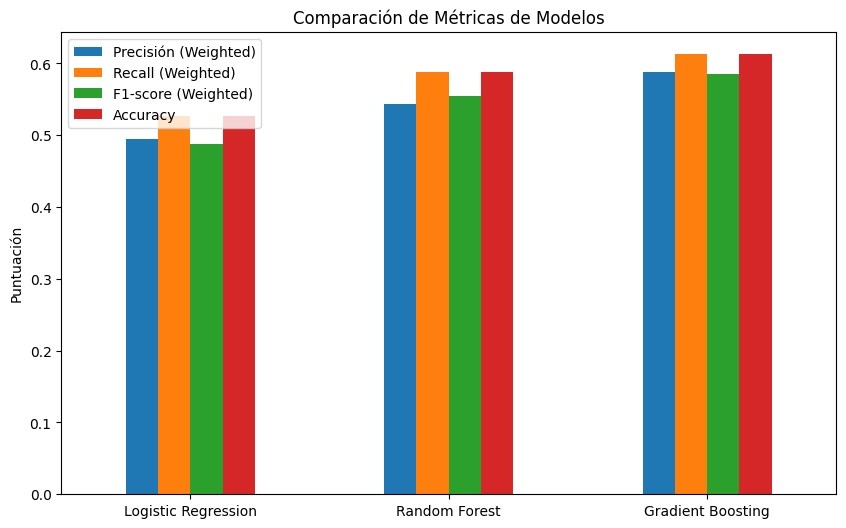

In [74]:
# Extraer métricas para comparación
model_metrics = {}
for model_name, model_results in results.items():
    report = model_results["classification_report"]
    model_metrics[model_name] = {
        "Precisión (Weighted)": report["weighted avg"]["precision"],
        "Recall (Weighted)": report["weighted avg"]["recall"],
        "F1-score (Weighted)": report["weighted avg"]["f1-score"],
        "Accuracy": report["accuracy"]
    }

# Crear DataFrame de comparación
df_metrics = pd.DataFrame(model_metrics).transpose()

print("\nComparación de Métricas entre Modelos:")
print(df_metrics)

# Visualizar la comparación con un gráfico de barras
df_metrics.plot(kind='bar', figsize=(10, 6))
plt.title("Comparación de Métricas de Modelos")
plt.ylabel("Puntuación")
plt.xticks(rotation=0)  # Rotar las etiquetas del eje x para mejor legibilidad
plt.show()


In [75]:
import pickle

# Guardar el mejor modelo encontrado por GridSearchCV
with open("best_model.pkl", "wb") as f:
    pickle.dump(grid_search.best_estimator_, f)